# 코로나 데이터 분석

---

## 프로젝트 목표
- 서울시 코로나 19 확진자 현황 데이터를 분석하여 유의미한 정보 도출
- 탐색적 데이터 분석을 수행하기 위한 데이터 정제, 특성 엔지니어링, 시각화 방법 학습

---

## 프로젝트 목차
1. **데이터 읽기:** 코로나 데이터를 불러오고 Dataframe 구조를 확인

2. **데이터 정제:** 비어 있는 데이터 또는 쓸모 없는 데이터를 삭제

3. **데이터 시각화:** 각 변수 별로 추가적인 정제 또는 feature engineering 과정을 거치고 시각화를 통하여 데이터의 특성 파악

---

## 데이터 출처
-  https://www.data.go.kr/tcs/dss/selectFileDataDetailView.do?publicDataPk=15063273

---

## 프로젝트 개요

2020년 초에 발생한 코로나19 바이러스는 세계적으로 대유행하였고 이에 대한 많은 분석이 이루어지고 있습니다. 유행 초기엔 이를 분석할 데이터가 충분하지 않았지만 최근에는 다양한 데이터 기관에서 코로나 관련 데이터를 공공으로 제공하고 있습니다.

이번 프로젝트에서는 국내 공공데이터 포털에서 제공하는 `서울시 코로나19 확진자 현황` 데이터를 바탕으로 탐색적 데이터 분석을 수행해보겠습니다. 국내 데이터 중 확진자 비율이 제일 높고 사람이 제일 많은 서울시의 데이터를 선정하였으며, 이를 바탕으로 코로나19의 확진 추이 및 환자 특성에 대해서 데이터를 바탕으로 알아봅시다.



---

## 1. 데이터 읽기

`pandas`를 사용하여 데이터를 읽고 어떠한 데이터가 저장되어 있는지 확인합니다.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# pd.read_csv를 통하여 dataframe 형태로 읽어옵니다.
corona_all = pd.read_csv('./data/서울시 코로나19 확진자 현황.csv')

In [3]:
# 상위 5개 데이터를 출력합니다.
corona_all.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,5748,10.21.,25530,NaN,NaN,양천구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
1,5747,10.21.,25528,NaN,NaN,강동구,NaN,강남서초 지인모임,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
2,5746,10.21.,25525,NaN,NaN,강남구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
3,5745,10.21.,25517,NaN,NaN,관악구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y
4,5744,10.21.,25504,NaN,NaN,관악구,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-10-22 10:58,2020-10-22 10:58,Y


In [4]:
# dataframe 정보를 요약하여 출력합니다. 
corona_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5748 entries, 0 to 5747
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      5748 non-null   int64  
 1   확진일     5748 non-null   object 
 2   환자번호    5748 non-null   int64  
 3   국적      0 non-null      float64
 4   환자정보    0 non-null      float64
 5   지역      5748 non-null   object 
 6   여행력     459 non-null    object 
 7   접촉력     5748 non-null   object 
 8   조치사항    0 non-null      float64
 9   상태      5357 non-null   object 
 10  이동경로    5520 non-null   object 
 11  등록일     5748 non-null   object 
 12  수정일     5748 non-null   object 
 13  노출여부    5748 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 628.8+ KB


In [44]:
type(corona_all.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5748 entries, 0 to 5747
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      5748 non-null   int64  
 1   확진일     5748 non-null   object 
 2   환자번호    5748 non-null   int64  
 3   국적      0 non-null      float64
 4   환자정보    0 non-null      float64
 5   지역      5748 non-null   object 
 6   여행력     459 non-null    object 
 7   접촉력     5748 non-null   object 
 8   조치사항    0 non-null      float64
 9   상태      5357 non-null   object 
 10  이동경로    5520 non-null   object 
 11  등록일     5748 non-null   object 
 12  수정일     5748 non-null   object 
 13  노출여부    5748 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 628.8+ KB


NoneType

In [45]:
info = corona_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5748 entries, 0 to 5747
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연번      5748 non-null   int64  
 1   확진일     5748 non-null   object 
 2   환자번호    5748 non-null   int64  
 3   국적      0 non-null      float64
 4   환자정보    0 non-null      float64
 5   지역      5748 non-null   object 
 6   여행력     459 non-null    object 
 7   접촉력     5748 non-null   object 
 8   조치사항    0 non-null      float64
 9   상태      5357 non-null   object 
 10  이동경로    5520 non-null   object 
 11  등록일     5748 non-null   object 
 12  수정일     5748 non-null   object 
 13  노출여부    5748 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 628.8+ KB


In [46]:
type(info)

NoneType

## 2. 데이터 정제

데이터를 읽고 확인했다면 결측값(missing data), 이상치(outlier)를 처리하는 데이터 정제 과정을 수행하여 봅시다.

#### 비어있는 column 지우기

`corona_all.info()` 코드를 통하여 `국적`, `환자정보`, `조치사항` 에 해당하는 데이터가 존재하지 않는 것을 알 수 있습니다.

`dataframe.drop()`를 사용하여 불필요한 `국적`, `환자정보`, `조치사항` 의 column 데이터를 삭제하고 이 dataframe을 `corona_del_col`에 저장해 봅시다.

In [5]:
# drop 함수를 사용하여 국적, 환자정보, 조치사항 coulmn 데이터를 삭제합니다.
corona_del_col = corona_all.drop(columns=['국적', '환자정보', '조치사항'])

In [6]:
# 정제 처리된 dataframe 정보를 출력합니다.
corona_del_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5748 entries, 0 to 5747
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연번      5748 non-null   int64 
 1   확진일     5748 non-null   object
 2   환자번호    5748 non-null   int64 
 3   지역      5748 non-null   object
 4   여행력     459 non-null    object
 5   접촉력     5748 non-null   object
 6   상태      5357 non-null   object
 7   이동경로    5520 non-null   object
 8   등록일     5748 non-null   object
 9   수정일     5748 non-null   object
 10  노출여부    5748 non-null   object
dtypes: int64(2), object(9)
memory usage: 494.1+ KB


## 3. 데이터 시각화

결측값을 처리한 `corona_del_col` 데이터를 바탕으로 각 column의 변수별로 어떠한 데이터 분포를 하고 있는지 시각화를 통하여 알아봅시다.

### 3.1. 확진일

`확진일` 데이터를 간단히 출력해보면 `월.일` 형태의 날짜 형식임을 알 수 있습니다.

월별, 일별 분석을 위해서는 문자열 형식의 데이터를 나누어 숫자 형 데이터로 변환해 보겠습니다.

In [7]:
corona_del_col['확진일']

0       10.21.
1       10.21.
2       10.21.
3       10.21.
4       10.21.
         ...  
5743     1.31.
5744     1.30.
5745     1.30.
5746     1.30.
5747     1.24.
Name: 확진일, Length: 5748, dtype: object

#### `확진일` 데이터를 `month`, `day` 데이터로 나누기

`확진일`에 저장된 문자열 데이터를 나누어 `month`, `day` column에 int64 형태로 저장해 봅시다.

In [8]:
# dataframe에 추가하기 전, 임시로 데이터를 저장해 둘 list를 선언합니다.
month = []
day = []

for data in corona_del_col['확진일']:
    # split 함수를 사용하여 월, 일을 나누어 list에 저장합니다.
    m, d = data.split('.')[:2]
    
    month.append(int(m))
    day.append(int(d))

In [9]:
# corona_del_col에 `month`, `day` column을 생성하며 동시에 list에 임시 저장된 데이터를 입력합니다.
corona_del_col['month'] = month
corona_del_col['day'] = day

#### 월별 확진자 수 출력

나누어진 `month`의 데이터를 바탕으로 달별 확진자 수를 막대그래프로 출력해 보겠습니다.

In [10]:
# 그래프에서 x축의 순서를 정리하기 위하여 order list를 생성합니다.
order_month = sorted(corona_del_col['month'].unique())
order_month

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

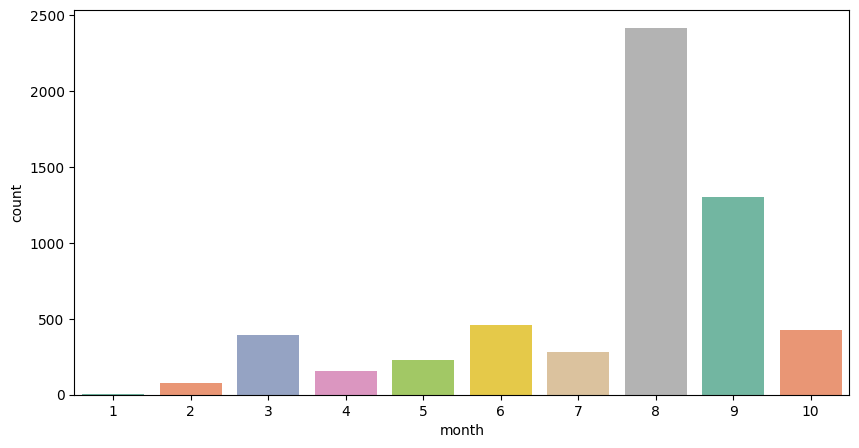

In [11]:
# 그래프의 사이즈를 조절합니다.
plt.figure(figsize=(10, 5))

# seaborn의 countplot 함수를 사용하여 출력합니다.
ax = sns.countplot(x="month", data=corona_del_col, palette="Set2", order=order_month)

<Axes: xlabel='month'>

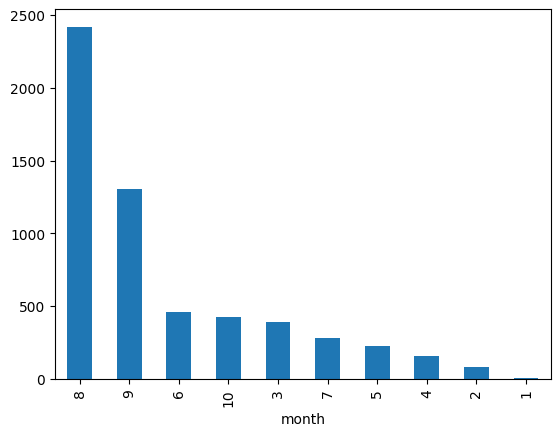

In [12]:
# series의 plot 함수를 사용한 출력 방법도 있습니다.
corona_del_col['month'].value_counts().plot(kind='bar')

In [13]:
# value_counts()는 각 데이터를 세어서 내림차순으로 정리하는 함수입니다.
corona_del_col['month'].value_counts()

month
8     2416
9     1304
6      460
10     425
3      391
7      281
5      228
4      156
2       80
1        7
Name: count, dtype: int64

#### 8월 일별 확진자 수 출력

월별 확진자 수를 출력해보면 알 수 있듯이 8월에 확진자 수가 가장 많았습니다.

이번엔 8월 동안 확진자 수가 어떻게 늘었는지 일별 확진자 수를 막대그래프로 출력해 봅시다.

In [14]:
# 그래프에서 x축의 순서를 정리하기 위하여 order list를 생성합니다.
order_day = sorted(corona_del_col['day'].unique())
order_day

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31]

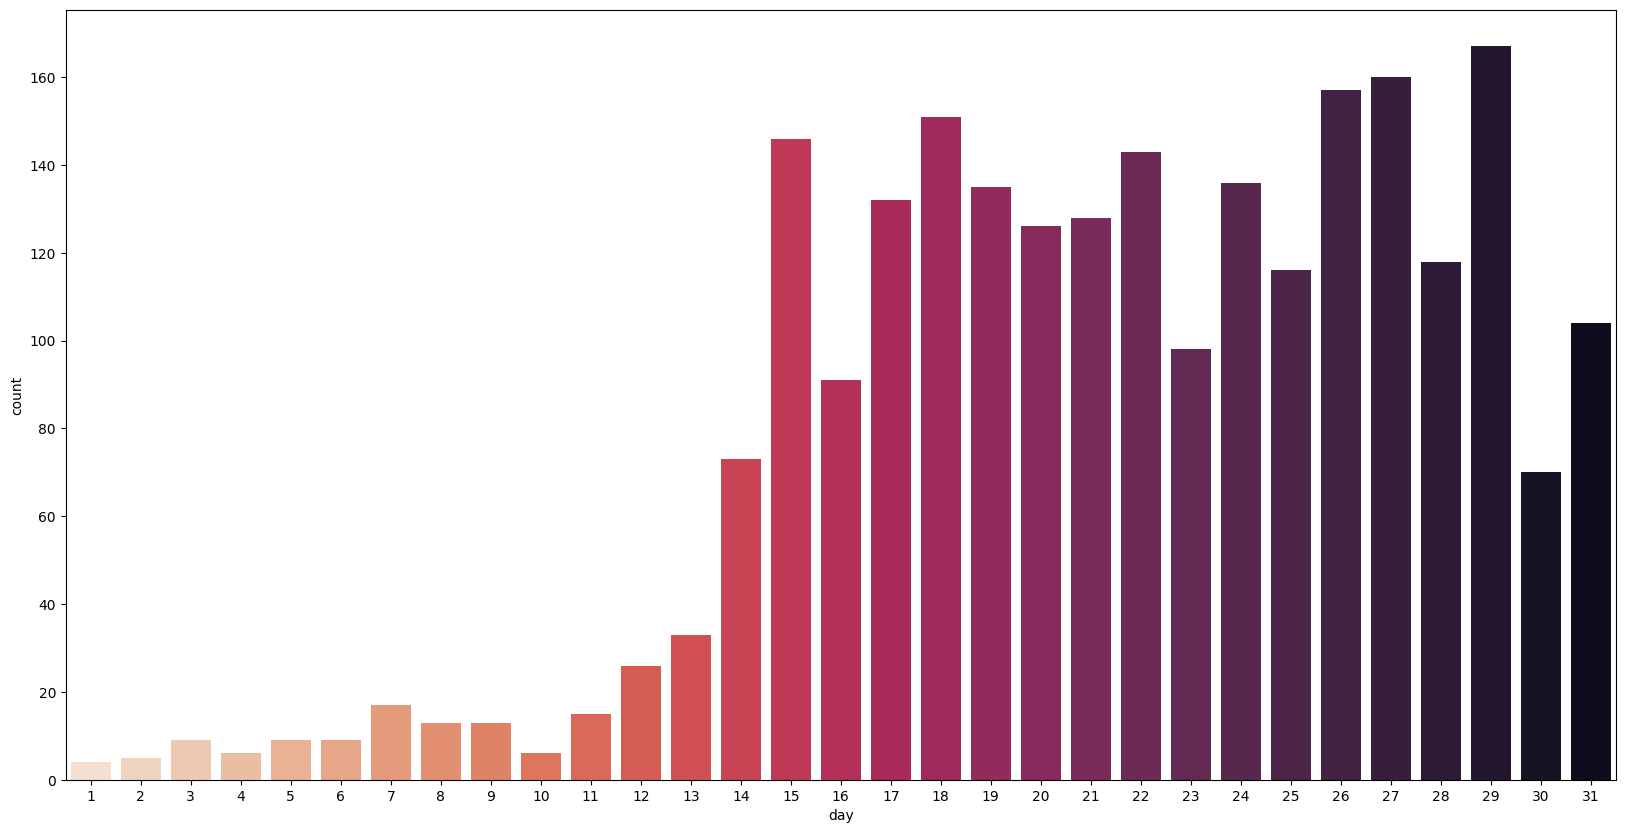

In [15]:
# seaborn의 countplot 함수를 사용하여 출력합니다.
plt.figure(figsize=(20, 10))
ax = sns.countplot(x="day", data=corona_del_col[corona_del_col['month'] == 8], palette="rocket_r", order=order_day)

### 3.2. 지역

`지역` 데이터를 간단히 출력해보면 `oo구` 형태의 문자열 데이터임을 알 수 있습니다.

In [16]:
corona_del_col['지역']

0       양천구
1       강동구
2       강남구
3       관악구
4       관악구
       ... 
5743    성북구
5744    마포구
5745    종로구
5746    중랑구
5747    강서구
Name: 지역, Length: 5748, dtype: object

#### 지역별 확진자 수 출력

이번에는 지역별로 확진자가 얼마나 있는지 막대그래프로 출력해 봅시다.

In [17]:
import matplotlib.font_manager as fm

font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    fm.fontManager.addfont(font_file)

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
/Users/elicer/miniforge3/envs/samsung_runbox/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  func(*args, **kwargs)
/Users/elicer/miniforge3/envs/samsung_runbox/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from current font.
  func(*args, **kwargs)
/Users/elicer/miniforge3/envs/samsung_runbox/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  func(*args, **kwargs)
findfont: Font family 'NanumBarunGothic' not found.
/Users/elicer/miniforge3/envs/samsung_runbox/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  func(*args, **kwargs)
/Users/elicer/miniforge3/envs/

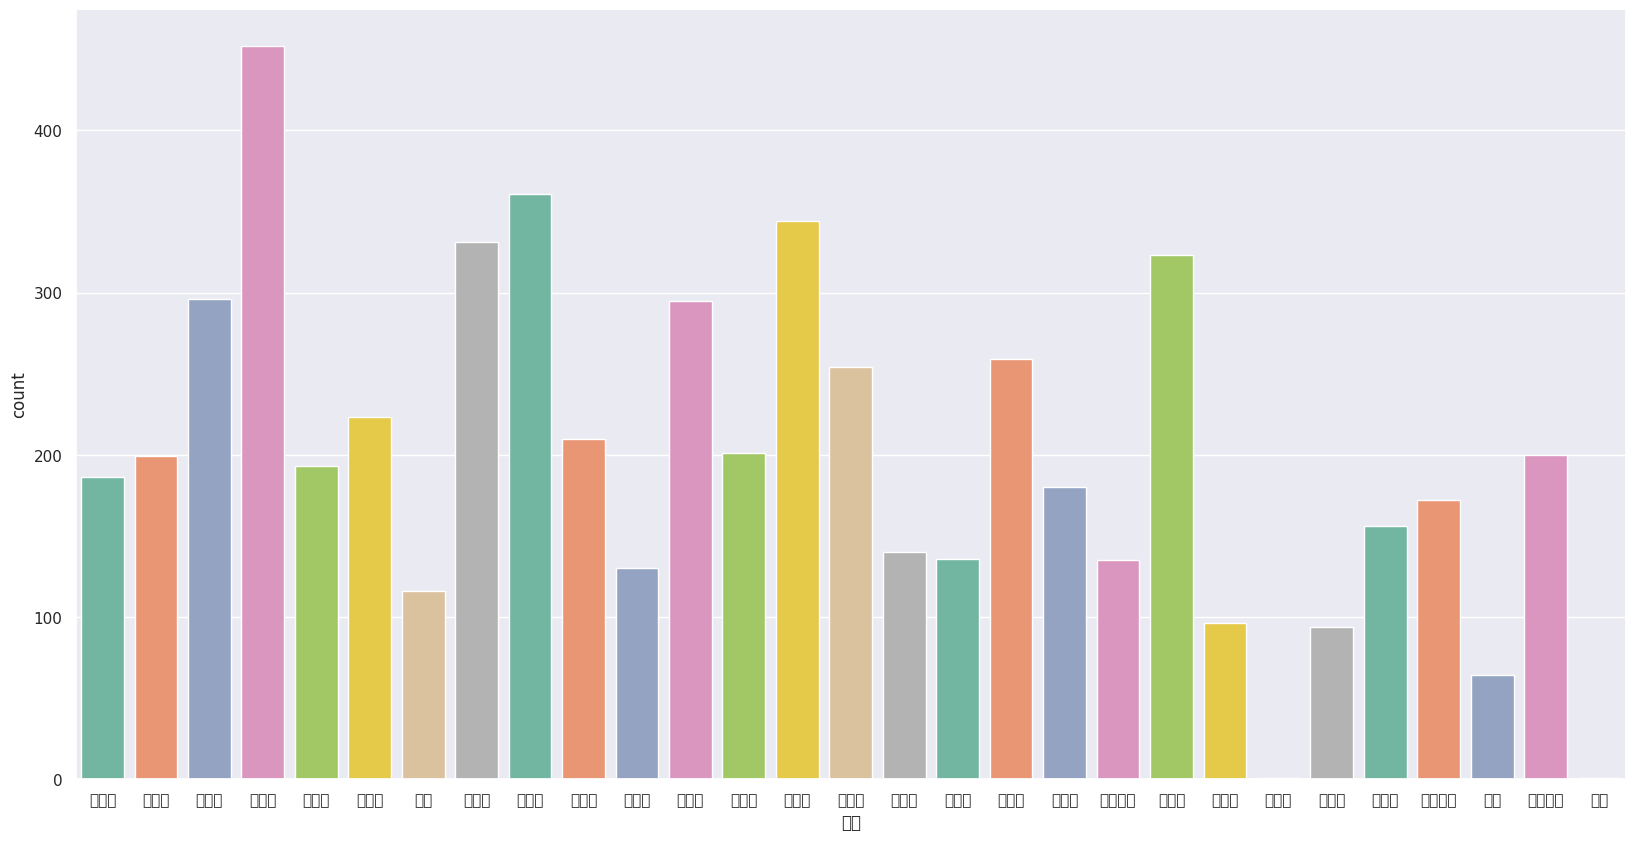

In [18]:
plt.figure(figsize=(20, 10))
# 한글 출력을 위해서 폰트 옵션을 설정합니다.
sns.set(
    font="NanumBarunGothic",
    rc={"axes.unicode_minus": False},
    style='darkgrid'
)
ax = sns.countplot(x="지역", data=corona_del_col, palette="Set2")

#### 지역 이상치 데이터 처리

위의 출력된 데이터를 보면 `종랑구`라는 잘못된 데이터와 `한국`이라는 지역과는 맞지 않는 데이터가 있음을 알 수 있습니다.

기존 지역 데이터 특성에 맞도록 `종랑구` -> `중랑구`, `한국` -> `기타`로 데이터를 변경해 봅시다.

In [19]:
# replace 함수를 사용하여 해당 데이터를 변경합니다.
# 이상치가 처리된 데이터이기에 새로운 Dataframe으로 저장합니다.
corona_out_region = corona_del_col.replace({'종랑구': '중랑구', '한국': '기타'})

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
/Users/elicer/miniforge3/envs/samsung_runbox/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 50577 (\N{HANGUL SYLLABLE YANG}) missing from current font.
  func(*args, **kwargs)
/Users/elicer/miniforge3/envs/samsung_runbox/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from current font.
  func(*args, **kwargs)
/Users/elicer/miniforge3/envs/samsung_runbox/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  func(*args, **kwargs)
findfont: Font family 'NanumBarunGothic' not found.
/Users/elicer/miniforge3/envs/samsung_runbox/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  func(*args, **kwargs)
/Users/elicer/miniforge3/envs/

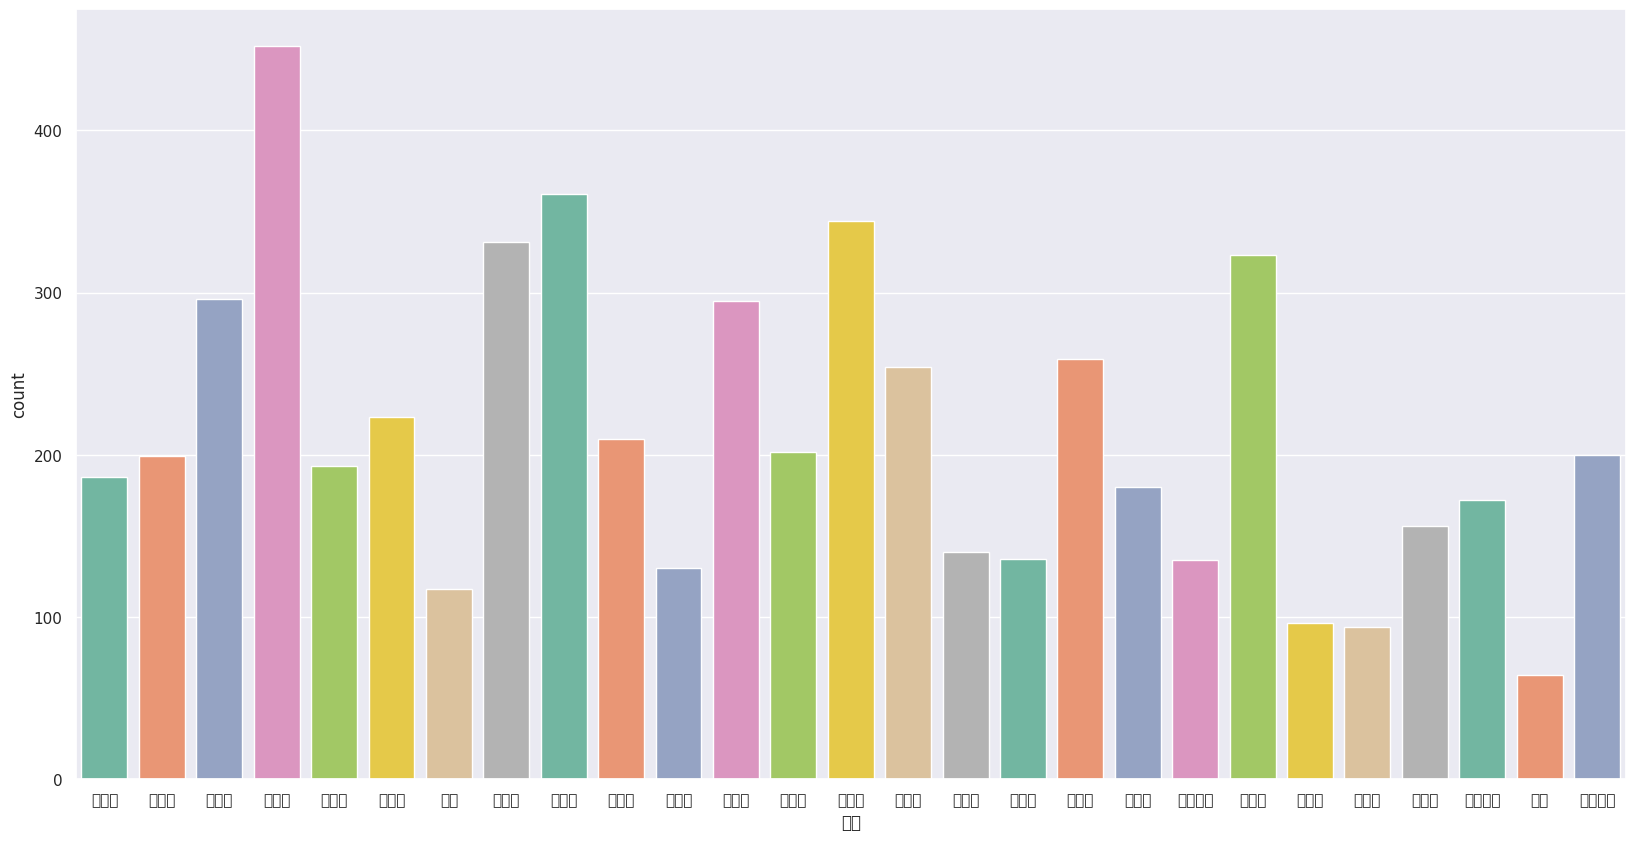

In [20]:
# 이상치가 처리된 데이터를 다시 출력해 봅시다.
plt.figure(figsize=(20, 10))
sns.set(
    font="NanumBarunGothic",
    rc={"axes.unicode_minus": False},
    style='darkgrid'
)
ax = sns.countplot(x="지역", data=corona_out_region, palette="Set2")

#### 8월달 지역별 확진자 수 출력

감염자가 많았던 8월에는 지역별로 확진자가 어떻게 분포되어 있는지 막대그래프로 출력해 봅시다.

In [21]:
# 논리연산을 이용한 조건을 다음과 같이 사용하면 해당 조건에 맞는 데이터를 출력할 수 있습니다.
corona_out_region[corona_out_region['month'] == 8]

,연번,확진일,환자번호,지역,여행력,접촉력,상태,이동경로,등록일,수정일,노출여부,month,day
1271,4477,8.31.,20132,타시도,NaN,감염경로 조사중,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,31
1272,4476,8.25.,17968,타시도,NaN,성북구 사랑제일교회 관련,NaN,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,25
1273,4475,8.26.,18821,타시도,NaN,타시도 확진자 접촉,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,26
1274,4474,8.27.,18818,타시도,NaN,기타 확진자 접촉,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,27
1504,4244,8.30.,20116,타시도,NaN,감염경로 조사중,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4140,1608,8.2.,14382,용산구,일본,해외 접촉 추정,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,2
4141,1607,8.1.,14364,양천구,NaN,송파구 확진자 접촉,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,1
4142,1606,8.1.,14362,종로구,NaN,종로구 지인모임 신명투자,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,1
4144,1604,8.1.,14366,강서구,NaN,강서구 요양시설관련,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,1


findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
/Users/elicer/miniforge3/envs/samsung_runbox/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  func(*args, **kwargs)
/Users/elicer/miniforge3/envs/samsung_runbox/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
/Users/elicer/miniforge3/envs/samsung_runbox/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  func(*args, **kwargs)
findfont: Font family 'NanumBarunGothic' not found.
/Users/elicer/miniforge3/envs/samsung_runbox/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  func(*args, **kwargs)
/Users/elicer/miniforge3/envs/samsu

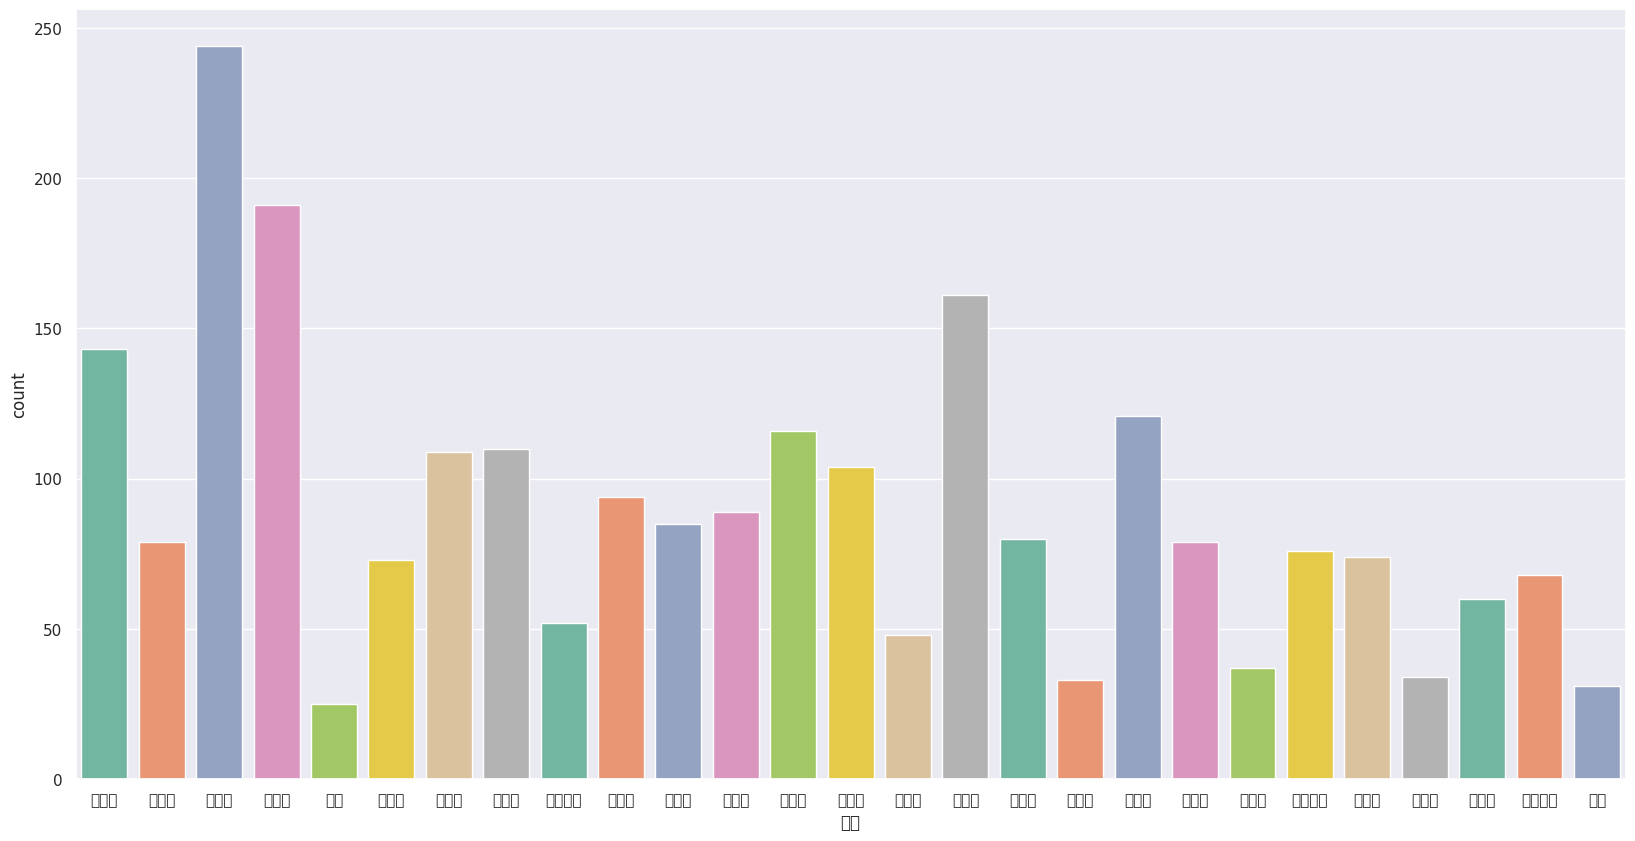

In [22]:
# 그래프를 출력합니다.
plt.figure(figsize=(20, 10))
sns.set(
    font="NanumBarunGothic", 
    rc={"axes.unicode_minus": False},
    style='darkgrid'
)
ax = sns.countplot(x="지역", data=corona_out_region[corona_del_col['month'] == 8], palette="Set2")

#### 월별 관악구 확진자 수 출력

이번에는 확진자가 가장 많았던 관악구 내의 확진자 수가 월별로 어떻게 증가했는지 그 분포를 막대그래프로 출력해 봅시다.

In [23]:
# 해당 column을 지정하여 series 형태로 출력할 수 있습니다.
corona_out_region['month'][corona_out_region['지역'] == '관악구']

3       10
4       10
6       10
7       10
8       10
        ..
5630     3
5661     2
5674     2
5695     2
5711     2
Name: month, Length: 452, dtype: int64

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
findfont: Fo

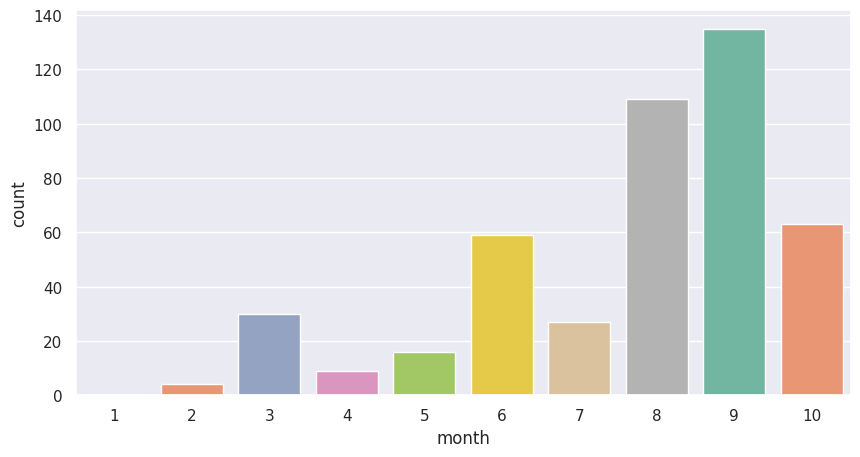

In [24]:
# 그래프를 출력합니다.
plt.figure(figsize=(10, 5))
ax = sns.countplot(
    x="month",
    data=corona_out_region[corona_out_region['지역'] == '관악구'],
    palette="Set2",
    order = order_month
)

#### 서울 지역에서 확진자를 지도에 출력

지도를 출력하기 위한 라이브러리로 folium을 사용해 봅시다.

In [25]:
# 지도 출력을 위한 라이브러리 folium을 import 합니다.
import folium

# Map 함수를 사용하여 지도를 출력합니다.
map_osm = folium.Map(location=[37.529622, 126.984307], zoom_start=11)
map_osm

지역마다 지도에 정보를 출력하기 위해서는 각 지역의 좌표정보가 필요합니다.

이를 해결하기 위해서 서울시 행정구역 시군 정보 데이터를 불러와 사용합니다.

데이터 출처: https://data.seoul.go.kr/dataList/OA-11677/S/1/datasetView.do

In [26]:
# CRS에 저장합니다.
CRS = pd.read_csv("./data/서울시 행정구역 시군구 정보 (좌표계_ WGS1984).csv")

In [27]:
# Dataframe을 출력해 봅니다.
CRS

,순번,시군구코드,시군구명_한글,시군구명_영문,ESRI_PK,위도,경도
0,1,11320,도봉구,Dobong-gu,0,37.665861,127.031767
1,2,11380,은평구,Eunpyeong-gu,1,37.617612,126.922700
2,3,11230,동대문구,Dongdaemun-gu,2,37.583801,127.050700
3,4,11590,동작구,Dongjak-gu,3,37.496504,126.944307
4,5,11545,금천구,Geumcheon-gu,4,37.460097,126.900155
5,6,11530,구로구,Guro-gu,5,37.495486,126.858121
6,7,11110,종로구,Jongno-gu,6,37.599100,126.986149
7,8,11305,강북구,Gangbuk-gu,7,37.646995,127.014716
8,9,11260,중랑구,Jungnang-gu,8,37.595379,127.093967
9,10,11680,강남구,Gangnam-gu,9,37.495985,127.066409


저장된 데이터에서 지역명이 `도봉구`인 데이터를 뽑아봅시다.

In [28]:
CRS[CRS['시군구명_한글'] == '도봉구']

,순번,시군구코드,시군구명_한글,시군구명_영문,ESRI_PK,위도,경도
0,1,11320,도봉구,Dobong-gu,0,37.665861,127.031767


이제 for 문을 사용하여 지역마다 확진자를 원형 마커를 사용하여 지도에 출력해 봅시다.

In [29]:
# corona_out_region의 지역에는 'oo구' 이외로 `타시도`, `기타`에 해당되는 데이터가 존재 합니다.
# 위 데이터에 해당되는 위도, 경도를 찾을 수 없기에 삭제하여 corona_seoul로 저장합니다.
corona_seoul = corona_out_region.drop(corona_out_region[corona_out_region['지역'] == '타시도'].index)
corona_seoul = corona_seoul.drop(corona_out_region[corona_out_region['지역'] == '기타'].index)

# 서울 가운데 좌표를 잡아 지도를 출력합니다.
map_osm = folium.Map(location=[37.529622, 126.984307], zoom_start=11)

# 지역 정보를 set 함수를 사용하여 25개 고유의 지역을 뽑아냅니다.
for region in set(corona_seoul['지역']):
    # 해당 지역의 데이터 개수를 count에 저장합니다.
    count = len(corona_seoul[corona_seoul['지역'] == region])

    # 해당 지역의 데이터를 CRS에서 뽑아냅니다.
    CRS_region = CRS[CRS['시군구명_한글'] == region]

    # CircleMarker를 사용하여 지역마다 원형마커를 생성합니다.
    marker = folium.CircleMarker(
        [CRS_region['위도'], CRS_region['경도']],   # 위치
        radius=(count / 10) + 10,       # 범위
        color='#3186cc',            # 선 색상
        fill_color='#3186cc',       # 면 색상
        popup=' '.join((region, str(count), '명'))
    ) # 팝업 설정
    
    # 생성한 원형마커를 지도에 추가합니다.
    marker.add_to(map_osm)

map_osm

/Users/elicer/miniforge3/envs/samsung_runbox/lib/python3.10/site-packages/folium/utilities.py:69: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  float(coord)
/Users/elicer/miniforge3/envs/samsung_runbox/lib/python3.10/site-packages/folium/utilities.py:77: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  if math.isnan(float(coord)):
/Users/elicer/miniforge3/envs/samsung_runbox/lib/python3.10/site-packages/folium/utilities.py:79: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return [float(x) for x in coords]


### 3.3. 여행력

`여행력` 데이터를 간단히 출력해보면 `NaN`과 해외 지역명의 문자열 데이터임을 알 수 있습니다.

In [30]:
corona_out_region['여행력']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
         ...  
5743       NaN
5744    중국 우한시
5745       NaN
5746    중국 우한시
5747    중국 우한시
Name: 여행력, Length: 5748, dtype: object

#### 여행력 있다 vs 없다 출력

먼저 여행력이 있는 사람과 없는 사람이 어느 정도인지를 비교해 보겠습니다. 

여행력이 없는 사람은 `NaN`에 해당되는 사람으로 비어있는 데이터의 수를 세어 계산합니다.

In [31]:
# isnull 함수를 사용하여 여행력이 없는 사람들의 수를 계산합니다.
sum_travel_no = sum(corona_out_region['여행력'].isnull())
print(f"여행력이 없는 사람의 수: {sum_travel_no}")

여행력이 없는 사람의 수: 5289


In [32]:
# 전체 샘플 수를 구합니다.
sum_travel_all = len(corona_out_region['여행력'])
print(f"전체 확진자 수: {sum_travel_all}")

# 여행력이 있는 사람들의 수를 계산합니다.
sum_travel_yes = sum_travel_all - sum_travel_no
print(f"여행력이 있는 사람의 수: {sum_travel_yes}")

전체 확진자 수: 5748
여행력이 있는 사람의 수: 459


<BarContainer object of 2 artists>

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
/Users/elicer/miniforge3/envs/samsung_runbox/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 51080 (\N{HANGUL SYLLABLE ISS}) missing from current font.
  func(*args, **kwargs)
/Users/elicer/miniforge3/envs/samsung_runbox/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 45796 (\N{HANGUL SYLLABLE DA}) missing from current font.
  func(*args, **kwargs)
findfont: Font family 'NanumBarunGothic' not found.
/Users/elicer/miniforge3/envs/samsung_runbox/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 50630 (\N{HANGUL SYLLABLE EOBS}) missing from current font.
  func(*args, **kwargs)
findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
/Users/elicer/miniforge3/envs/samsung_runbox/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 50668 (\N{H

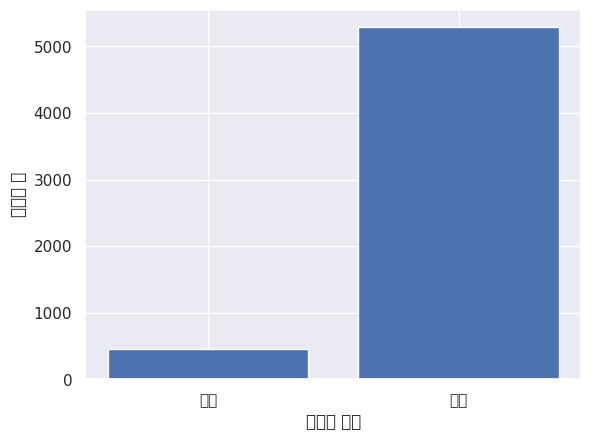

In [33]:
# matplotlib의 bar 함수를 사용하여 막대 그래프를 출력합니다.
# 한글 출력을 위한 세팅을 합니다.
plt.rc('font', family="NanumBarunGothic")

# x축, y축 명칭을 설정합니다.
plt.ylabel('확진자 수')
plt.xlabel('여행력 여부')

# 그래프 x축에 해당되는 데이터와 y축에 해당되는 데이터를 list 형태로 입력합니다.
plt.bar(['있다', '없다'], [sum_travel_yes, sum_travel_no])

#### 여행지 분포 출력

이번에는 어떠한 여행지들이 있는 그 분포를 출력해 봅시다.

먼저 459개의 여행지 데이터에서 중복을 제외한 모든 종류의 여행지를 출력해 봅시다.

In [34]:
# unique 함수를 사용하여 중복을 제외한 여행지를 출력합니다.
corona_out_region['여행력'].unique()

array([nan, '키르기스스탄', '미국', '인도', '이란', '체코', '폴란드', '프랑스', '필리핀',
       '방글라데시', '일본', '브라질', '우즈베키스탄', '요르단', '쿠웨이트', '인도네시아', '우간다',
       '몰타', '영국', '네팔', '카타르', '우크라이나', '에콰도르', '키르기즈스탄', '파라과이',
       '멕시코 미국', '카자흐스탄', '독일', '중국', '이집트', '21263', '터키', '사우디아라비아',
       '베트남', '에티오피아', '스페인', '케냐', '멕시코', '홍콩', '러시아', '이라크', '모로코 터키',
       '나이지리아', '미국 멕시코', '페루', '아랍에미리트', 'UAE', '파키스탄', '아일랜드', '콩코 프랑스',
       '캐나다', '페루 미국', '프랑스 스페인 독일 이탈리아 네덜란드', '팔라우', '호주 인도네시아', '이탈리아',
       '포르투칼', '미국 캐나다 멕시코', '미국 뉴욕', '오스트리아', '미국 브라질', '태국',
       '아르헨티나 볼리비아 브라질', '말레이시아', '필리핀 마닐라', '브라질 아르헨티아 칠레 볼리비아',
       '프랑스 독일', '미국 캐나다', '스페인 카타르', '이탈리아 프랑스', '체코 헝가리 오스트리아 이탈리아 프랑스',
       '모로코 프랑스 오스트리아', '영국 프랑스', '스페인체코', '독일프랑스', '프랑스 스페인', '스페인 프랑스',
       '이탈리아 독일 홍콩', '중국 청도', '우한교민', '중국 우한시', '싱가포르', '우한 교민'],
      dtype=object)

`21263`이라는 알 수 없는 여행지의 정보가 있기에 그 데이터를 출력해보겠습니다.

In [35]:
corona_out_region[corona_out_region['여행력'] == '21263']

,연번,확진일,환자번호,지역,여행력,접촉력,상태,이동경로,등록일,수정일,노출여부,month,day
2182,3566,8.28.,21263,노원구,21263,기타 확진자 접촉,퇴원,이동경로 공개기간 경과,2020-10-22 10:58,2020-10-23 9:00,Y,8,28


여행지 `21263`에 대한 정보를 파악할 수 없기에 `기타`로 변경하고 도수 분포표를 출력해 봅시다.

In [36]:
# 출력 결과를 모두 볼 수 있도록 세팅합니다.
pd.set_option('display.max_rows', None)

# replace 함수를 사용하여 기타로 변경하고 value_counts 함수를 사용하여 도수 분포표를 출력합니다.
corona_out_region.replace({'21263': '기타'})['여행력'].value_counts()

여행력
미국                       153
영국                        50
필리핀                       25
인도                        13
프랑스                       13
우즈베키스탄                    13
스페인                       12
이라크                       10
일본                        10
카자흐스탄                     10
인도네시아                      7
멕시코                        7
키르기스스탄                     6
태국                         6
캐나다                        5
체코                         5
브라질                        5
러시아                        5
폴란드                        4
독일                         4
파키스탄                       4
이탈리아                       4
중국 우한시                     4
네팔                         3
UAE                        3
페루                         3
터키                         3
베트남                        3
방글라데시                      3
프랑스 독일                     2
팔라우                        2
아일랜드                       2
아랍에미리트                     2
이탈리아 프랑스                   2
필리핀 마닐라   

### 3.4. 접촉력

`접촉력` 데이터를 출력해보면 코로나를 접촉한 방식을 설명하는 문자열 데이터임을 알 수 있습니다.

In [37]:
corona_out_region['접촉력']

0                      감염경로 조사중
1                     강남서초 지인모임
2                     기타 확진자 접촉
3                      감염경로 조사중
4                     기타 확진자 접촉
5                      감염경로 조사중
6                   관악구 삼모스포렉스Ⅱ
7                   관악구 삼모스포렉스Ⅱ
8                   관악구 삼모스포렉스Ⅱ
9                   관악구 삼모스포렉스Ⅱ
10                  관악구 삼모스포렉스Ⅱ
11                     감염경로 조사중
12                도봉구 예마루데이케어센터
13                    강남서초 지인모임
14                     도봉구 다나병원
15                   강남구 CJ텔레닉스
16                    강남서초 지인모임
17                    강남서초 지인모임
18                        해외 유입
19                        해외 유입
20                    강남서초 지인모임
21                        해외 유입
22                     감염경로 조사중
23                     감염경로 조사중
24                    기타 확진자 접촉
25                        해외 유입
26                    강남서초 지인모임
27                  관악구 삼모스포렉스Ⅱ
28                    강남서초 지인모임
29                    기타 확진자 접촉
30                  관악구 삼모스포렉스Ⅱ
31      

#### 접촉력 도수분포표

확진자의 접촉력은 다양하게 기록되었습니다.

도수분포표를 사용하여 정리해 봅시다.

In [38]:
corona_out_region['접촉력'].value_counts()

접촉력
기타 확진자 접촉                  818
성북구 사랑제일교회 관련              641
확인 중                       586
해외 접촉 추정                   415
감염경로 조사중                   373
타시도 확진자 접촉                 244
이태원 클럽 관련                  139
8.15서울도심집회                 126
리치웨이 관련                    119
도봉구 다나병원                    68
구로구 콜센터 관련                  60
노원구 빛가온교회 관련                46
요양시설 관련                     43
양천구 운동시설 관련                 43
성북구 체대입시 관련                 43
확인중                         42
용인시 우리제일교회 관련               41
구로구 교회 관련                   41
강남구 K보건산업                   37
콜센터직원 접촉                    37
수도권 개척교회 관련                 37
서대문구 세브란스병원                 37
극단 산 관련                     37
구로구 아파트 관련                  36
강남구 사무실 관련                  36
도봉구 예마루데이케어센터               34
용인시 우리제일교회                  33
동작구 소재 서울신학교                32
동작구 진흥글로벌                   31
왕성교회 관련                     30
여의도 순복음교회 관련                29
강남구 소재 대우디오빌플러스             29
동대문구

<Axes: xlabel='접촉력'>

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
/Users/elicer/miniforge3/envs/samsung_runbox/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  func(*args, **kwargs)
/Users/elicer/miniforge3/envs/samsung_runbox/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  func(*args, **kwargs)
/Users/elicer/miniforge3/envs/samsung_runbox/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from current font.
  func(*args, **kwargs)
/Users/elicer/miniforge3/envs/samsung_runbox/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  func(*args, **kwargs)
/Users/elicer/miniforge3/envs/samsung_runbox/lib/python3.10/site-packages/IPython/cor

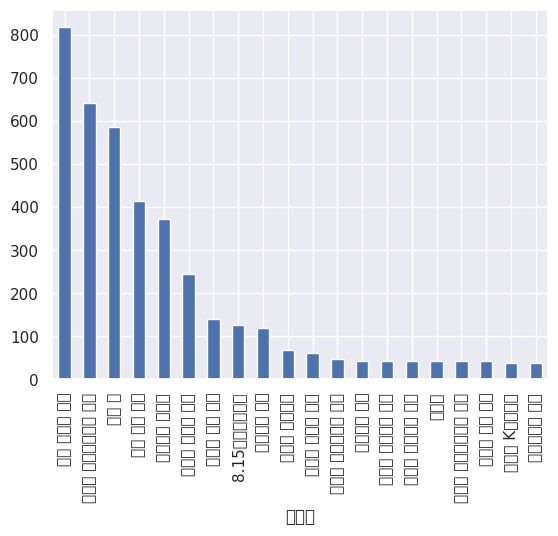

In [39]:
# 접촉력 항목 개수가 많은 관계로 가장 많은 확진자를 가지는 20개의 접촉력만 확인하겠습니다.
corona_out_region['접촉력'].value_counts()[:20].plot(kind='bar')

### 3.5. 상태

`상태` 데이터를 출력해보면 현재 환자 상태를 확인할 수 있는 문자열 데이터임을 알 수 있습니다.

In [40]:
corona_out_region['상태']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
6       NaN
7       NaN
8       NaN
9       NaN
10      NaN
11      NaN
12      NaN
13      NaN
14      NaN
15      NaN
16      NaN
17      NaN
18      NaN
19      NaN
20      NaN
21      NaN
22      NaN
23      NaN
24      NaN
25      NaN
26      NaN
27      NaN
28      NaN
29      NaN
30      NaN
31      NaN
32      NaN
33      NaN
34      NaN
35      NaN
36      NaN
37      NaN
38      NaN
39      NaN
40      NaN
41      NaN
42      NaN
43      NaN
44      NaN
45      NaN
46      NaN
47      NaN
48      NaN
49      NaN
50      NaN
51      NaN
52      NaN
53      NaN
54      NaN
55      NaN
56      NaN
57      NaN
58      NaN
59      NaN
60      NaN
61      NaN
62      NaN
63      NaN
64      NaN
65      NaN
66      NaN
67      NaN
68      NaN
69      NaN
70      NaN
71      NaN
72      NaN
73      NaN
74      NaN
75      NaN
76      NaN
77      NaN
78      NaN
79      NaN
80      NaN
81      NaN
82      NaN
83  

#### 상태별 확진자 수 출력

데이터가 어떻게 이루어져 있는지 정확히 알기 위하여 중복을 제외한 모든 종류의 상태를 출력해 봅시다.

In [41]:
corona_out_region['상태'].unique()

array([nan, '퇴원', '사망'], dtype=object)

각 상태에 따른 확진자 수를 계산하여 봅시다.

In [42]:
sum_status_death = len(corona_out_region[corona_out_region['상태'] == '사망'])
print(f"사망자 수: {sum_status_death}")

sum_status_discharge = len(corona_out_region[corona_out_region['상태'] == '퇴원'])
print(f"퇴원자 수: {sum_status_discharge}")

sum_status_nan = sum(corona_out_region['상태'].isnull())
print(f"상태를 알 수 없는 사람들의 수: {sum_status_nan}")

사망자 수: 74
퇴원자 수: 5283
상태를 알 수 없는 사람들의 수: 391


최종적으로 상태에 따른 확진자 수를 막대 그래프로 표현해 봅시다.

<BarContainer object of 3 artists>

findfont: Font family 'NanumBarunGothic' not found.
findfont: Font family 'NanumBarunGothic' not found.
/Users/elicer/miniforge3/envs/samsung_runbox/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 53748 (\N{HANGUL SYLLABLE TOE}) missing from current font.
  func(*args, **kwargs)
findfont: Font family 'NanumBarunGothic' not found.
/Users/elicer/miniforge3/envs/samsung_runbox/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 47581 (\N{HANGUL SYLLABLE MANG}) missing from current font.
  func(*args, **kwargs)
findfont: Font family 'NanumBarunGothic' not found.
/Users/elicer/miniforge3/envs/samsung_runbox/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 50508 (\N{HANGUL SYLLABLE AL}) missing from current font.
  func(*args, **kwargs)
/Users/elicer/miniforge3/envs/samsung_runbox/lib/python3.10/site-packages/IPython/core/events.py:93: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fun

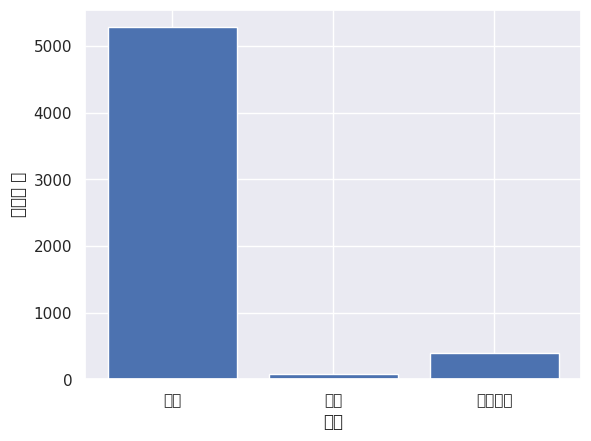

In [43]:
plt.ylabel('확진자 수')
plt.xlabel('상태')
plt.bar(['퇴원', '사망', '알수없음'], [sum_status_discharge, sum_status_death, sum_status_nan])

---

<span style="color:rgb(120, 120, 120)">본 학습 자료를 포함한 사이트 내 모든 자료의 저작권은 엘리스에 있으며 외부로의 무단 복제, 배포 및 전송을 불허합니다.

Copyright @ elice all rights reserved</span>